In [49]:
import pandas as pd
import difflib
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Grammar Correction.csv')

df = pd.DataFrame(data)

def get_deleted_added(incorrect_sentence, correct_sentence):
    
    diff = difflib.ndiff(incorrect_sentence.split(), correct_sentence.split())
    
    deleted_words = []
    added_words = []
    
    for word in diff:
        if word.startswith('- '):  
            deleted_words.append(word[2:])
        elif word.startswith('+ '):  
            added_words.append(word[2:])
    
    return ', '.join(deleted_words), ', '.join(added_words)

df[['Deleted_Words', 'Added_Words']] = df.apply(
    lambda row: get_deleted_added(row['Incorrect_Sentence'], row['Correct_Sentence']),
    axis=1, result_type='expand'
)

display(df)


FileNotFoundError: [Errno 2] No such file or directory: 'Grammar Correction.csv'

In [42]:
df.isnull().sum()

Error_Type            0
Incorrect_Sentence    0
Correct_Sentence      0
Deleted_Words         0
Added_Words           0
dtype: int64

In [43]:
df.duplicated().sum()

0

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Error_Type          5 non-null      object
 1   Incorrect_Sentence  5 non-null      object
 2   Correct_Sentence    5 non-null      object
 3   Deleted_Words       5 non-null      object
 4   Added_Words         5 non-null      object
dtypes: object(5)
memory usage: 328.0+ bytes


In [45]:
df.head()

,Error_Type,Incorrect_Sentence,Correct_Sentence,Deleted_Words,Added_Words
0,Verb Form,She go to the store every Monday.,She goes to the store every Monday.,go,goes
1,Subject-Verb Agreement,The book are on the table.,The book is on the table.,are,is
2,Preposition,He is good in soccer.,He is good at soccer.,in,at
3,Verb,it goes well.,it is goes well.,,is
4,:,it not good.,it is not too good.,,"is, too"


In [47]:
df['Incorrect_Length'] = df['Incorrect_Sentence'].apply(len)
df['Correct_Length'] = df['Correct_Sentence'].apply(len)
length_diff = abs(df['Incorrect_Length'] - df['Correct_Length'])

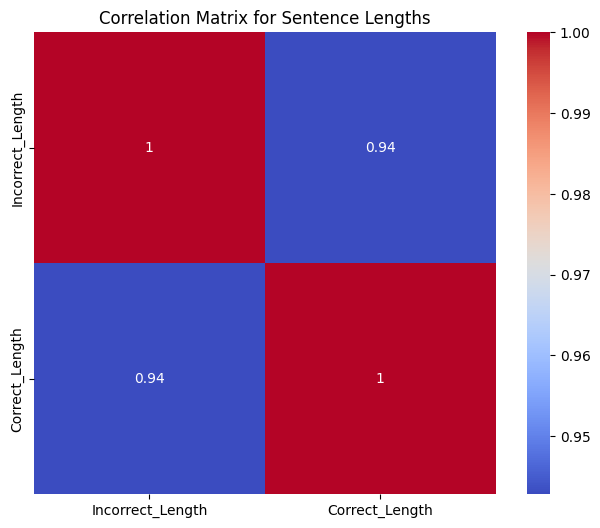

In [48]:
correlation = df[['Incorrect_Length', 'Correct_Length']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix for Sentence Lengths")
plt.show()